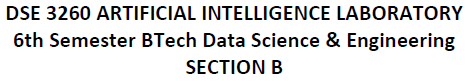

## Kartabya Krishna
## RegNo: 210968244
## Week: 2
## Date: 20240115

In [7]:
def shortest_pathDFS(source, target):
    """
    Returns the shortest list of (movie_id, person_id) pairs
    that connect the source to the target using Depth-First Search.

    If no possible path, returns None.
    """
    # Create initial node for the source person
    start = Node(state=source, parent=None, action=None)

    # Initialize the frontier using a stack
    frontier = StackFrontier()
    frontier.add(start)

    # Initialize an empty explored set
    explored = set()

    while not frontier.empty():
        # Choose a node from the frontier
        node = frontier.remove()

        # If node is the target, return the path
        if node.state == target:
            path = []
            while node.parent is not None:
                path.append((node.action, node.state))
                node = node.parent
            path.reverse()
            return path

        # Mark node as explored
        explored.add(node.state)

        # Add neighbors to the frontier
        neighbors = [(action, state) for action, state in neighbors_for_person(node.state) if state not in explored]
        frontier.frontier.extend([Node(state=state, parent=node, action=action) for action, state in neighbors])

    return None

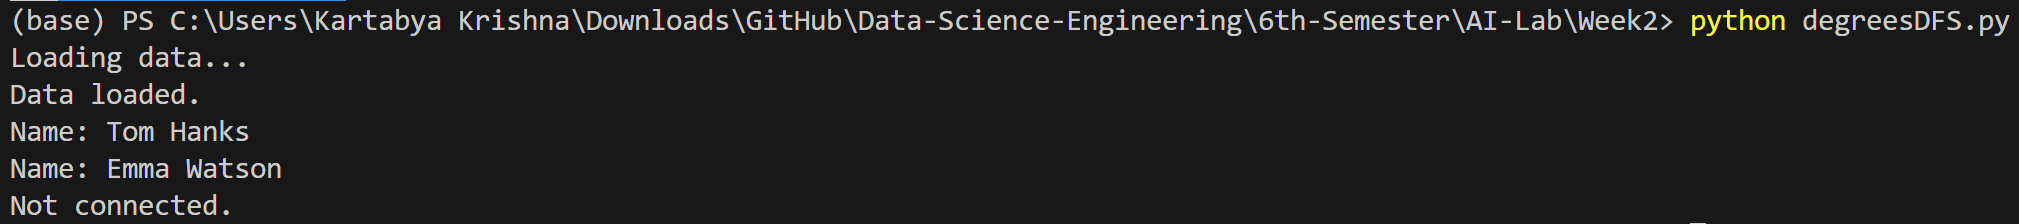

In [ ]:
def shortest_pathBFS(source, target):
    """
    Returns the shortest list of (movie_id, person_id) pairs
    that connect the source to the target using Breadth-First Search.

    If no possible path, returns None.
    """
    # Create initial node for the source person
    start = Node(state=source, parent=None, action=None)

    # Initialize the frontier using a queue
    frontier = QueueFrontier()
    frontier.add(start)

    # Initialize an empty explored set
    explored = set()

    while True:
        if frontier.empty():
            return None

        # Choose a node from the frontier
        node = frontier.remove()

        # If node is the target, return the path
        if node.state == target:
            path = []
            while node.parent is not None:
                path.append((node.action, node.state))
                node = node.parent
            path.reverse()
            return path

        # Mark node as explored
        explored.add(node.state)

        # Add neighbors to the frontier
        for action, state in neighbors_for_person(node.state):
            if state not in explored and not frontier.contains_state(state):
                child = Node(state=state, parent=node, action=action)
                frontier.add(child)

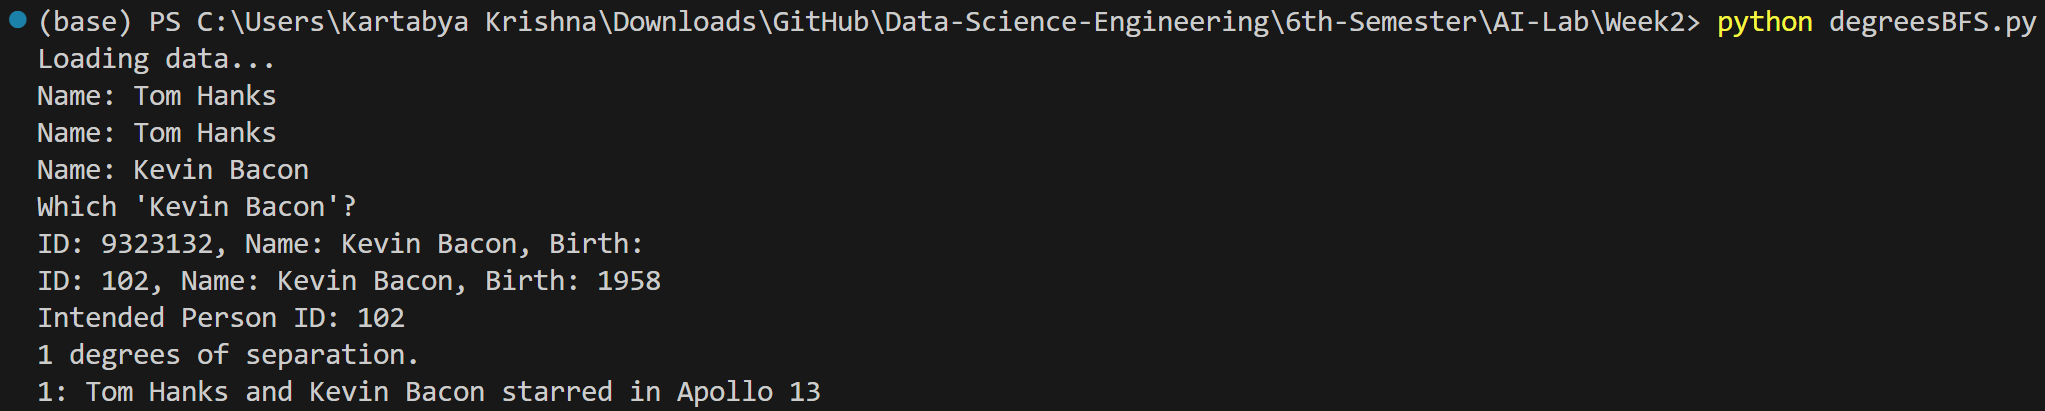

## Obseravations

| Criteria                          | Breadth-First Search (BFS)                  | Depth-First Search (DFS)                  |
|-----------------------------------|---------------------------------------------|-------------------------------------------|
| **Traversal Strategy**             | Explores all nodes at the current depth before moving on to the next depth level. | Explores as far as possible along each branch before backtracking. |
| **Memory Usage**                   | Requires more memory as it needs to store all nodes at the current depth. | Requires less memory as it only needs to store nodes along the current branch. |
| **Completeness**                   | Guaranteed to find the shortest path in an unweighted graph. | May not find the shortest path, especially in the presence of deep paths. |
| **Implementation**                 | Typically implemented using a queue.        | Typically implemented using a stack.      |
| **Applications in AI**             | Useful for searching in scenarios where the goal is likely to be closer to the starting state. | Suitable for scenarios where the solution may be deep in the search space. |
| **Parallelization**                | Less amenable to parallelization due to the sequential nature of exploration. | More amenable to parallelization as independent branches can be explored concurrently. |
| **Advantages**                     | - Guaranteed to find the shortest path in unweighted graphs. <br> - Suitable for scenarios with limited branching. | - Memory-efficient for scenarios with deep paths. <br> - May explore promising paths quickly. |
| **Disadvantages**                  | - Memory-intensive for scenarios with wide branching. <br> - May be inefficient in scenarios with deep paths. | - Not guaranteed to find the shortest path. <br> - Prone to getting stuck in deep paths. |

